### Q1) Predict delivery time using sorting time
Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import os
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'C:\\Users\\admin\\Downloads'

In [3]:
os.listdir(r'E:\Data Science Asssignment\Simple Linear Regression')

['delivery_time.csv', 'Problem_statements.txt', 'Salary_Data.csv']

In [4]:
os.chdir(r'C:\\Users\\admin\\Downloads')

In [5]:
dataset = pd.read_csv('delivery_time.csv')


In [6]:
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [7]:
# EDA and data visualization

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [9]:
dataset.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [10]:
data=dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [11]:
from scipy.stats import skew
print(skew(data.delivery_time))

0.326702631656106


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='delivery_time'>

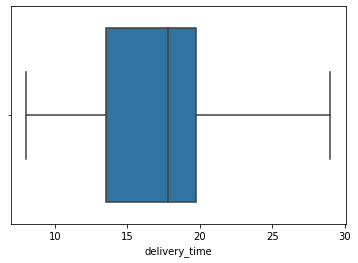

In [12]:
sns.boxplot(data['delivery_time'], orient = 'h')

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

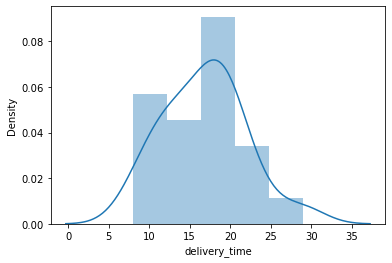

In [13]:
sns.distplot(data['delivery_time'])

In [14]:
print(skew(data.sorting_time))

0.043680994983108075


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sorting_time'>

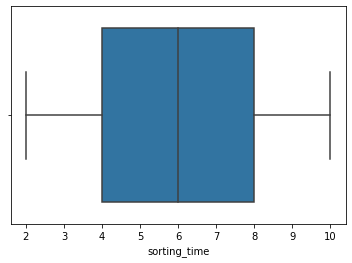

In [15]:
sns.boxplot(data['sorting_time'], orient='h')

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

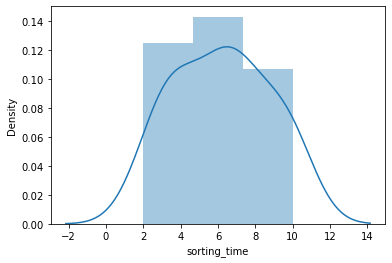

In [16]:
sns.distplot(data['sorting_time'])

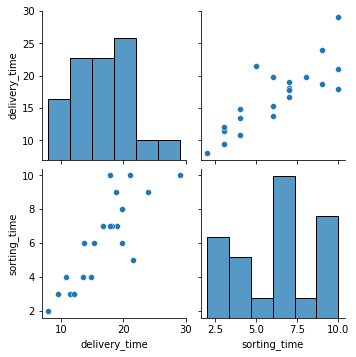

In [17]:
sns.pairplot(data)

#### Correlation analysis

In [18]:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:>

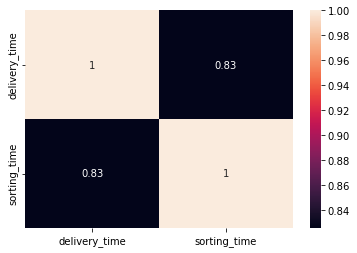

In [19]:
sns.heatmap(data.corr(), annot=True)

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

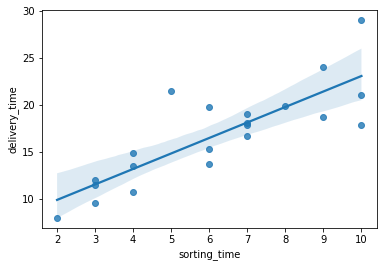

In [20]:
sns.regplot(x=data['sorting_time'],y=data['delivery_time'])

#### Model building

In [21]:
model1=smf.ols("delivery_time~np.log(sorting_time)",data=data).fit()

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 0, 'log(sorting_time)')

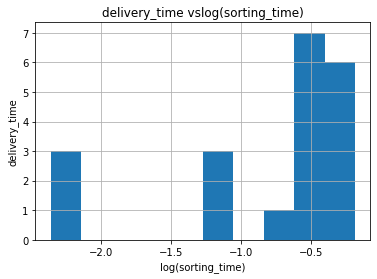

In [90]:
data['log_sorting_time']=np.log(data['sorting_time'])
data.hist('log_sorting_time',figsize=(6,4))
plt.title('delivery_time vslog(sorting_time)')
plt.ylabel('delivery_time')
plt.xlabel("log(sorting_time)")
                                

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 0, 'sqrt(sorting_time)')

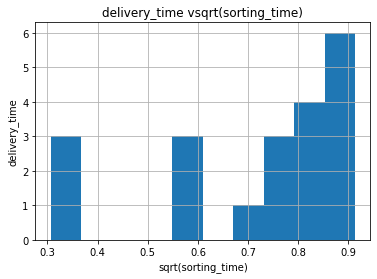

In [92]:
data['log_sorting_time']=np.sqrt(data['sorting_time'])
data.hist('log_sorting_time',figsize=(6,4))
plt.title('delivery_time vsqrt(sorting_time)')
plt.ylabel('delivery_time')
plt.xlabel("sqrt(sorting_time)")

Text(0.5, 0, 'cbrt(sorting_time)')

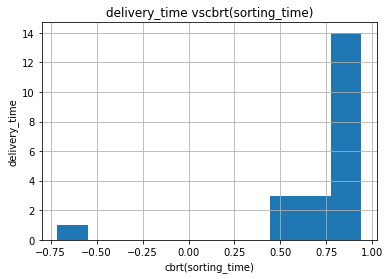

In [93]:
data['log_sorting_time']=np.cbrt(data['sorting_time'])
data.hist('log_sorting_time',figsize=(6,4))
plt.title('delivery_time vscbrt(sorting_time)')
plt.ylabel('delivery_time')
plt.xlabel("cbrt(sorting_time)")

#### Model Testing

In [32]:
print(model1.params,'\n''\n',model1.tvalues,'\n''\n',model1.pvalues)

Intercept               1.159684
np.log(sorting_time)    9.043413
dtype: float64 

 Intercept               0.472460
np.log(sorting_time)    6.586789
dtype: float64 

 Intercept               0.641980
np.log(sorting_time)    0.000003
dtype: float64


In [33]:
model1.tvalues , model1.pvalues

(Intercept               0.472460
 np.log(sorting_time)    6.586789
 dtype: float64,
 Intercept               0.641980
 np.log(sorting_time)    0.000003
 dtype: float64)

In [34]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           2.64e-06
Time:                        15:03:37   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
model1.rsquared , model1.rsquared_adj

(0.6954434611324223, 0.6794141696130761)

#### Model Prediction

In [36]:
delivery_time = (6.582734) + (1.649020)*(6)
delivery_time

16.476854

In [37]:
new_data=pd.Series([6,8])
new_data

0    6
1    8
dtype: int64

In [38]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,6
1,8


In [39]:
model1.predict(data_pred)

0    17.363305
1    19.964933
dtype: float64

#### From this model we can understand that above model is the best model

### Q2) Salary_hike -> Build a prediction model for Salary_hike
Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import os

In [41]:
os.getcwd()

'C:\\Users\\admin\\Downloads'

In [42]:
os.listdir(r'E:\Data Science Asssignment\Simple Linear Regression')

['delivery_time.csv', 'Problem_statements.txt', 'Salary_Data.csv']

In [43]:
os.chdir(r'C:\\Users\\admin\\Downloads')

In [44]:
data=pd.read_csv('Salary_Data.csv')


In [45]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


#### EDA and data visualization

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [47]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [48]:
data1 = data.rename(columns={'YearsExperience':'YE','Salary':'Sal'}, inplace=False)
data1

,YE,Sal
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [49]:
print(skew(data1.YE))

0.3603123252525561


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YE'>

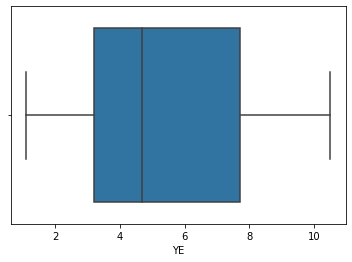

In [50]:
sns.boxplot(data1['YE'], orient = 'h')

- The data for Year Experience is skewed right.
- All the observations lies in the intervals of approximately 3 to 8
- We can say that the median years of experience is 5.2 years.

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YE', ylabel='Density'>

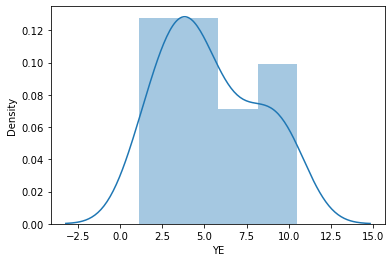

In [51]:
sns.distplot(data1['YE'])

#### The distribution of Year Experience data is slightly more on the right tail of the curve

In [52]:
print(skew(data1.Sal))

0.3361618825592921


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sal'>

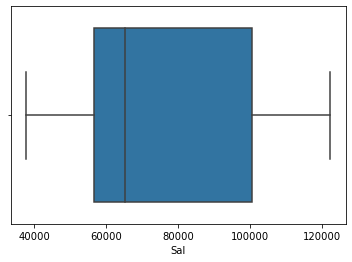

In [53]:
sns.boxplot(data1['Sal'], orient='h')

- The onservations for Salary lies nearly between 57000 to 110000.
- The data is skewed towars right side.
- The median Salary is nearly 65000.

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sal', ylabel='Density'>

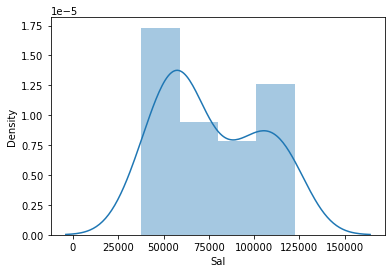

In [54]:
sns.distplot(data1['Sal'])

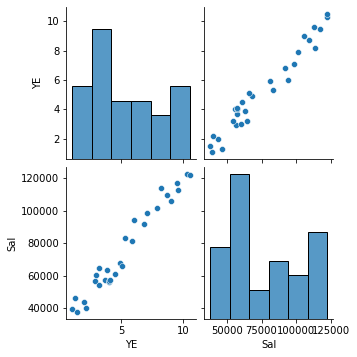

In [55]:
sns.pairplot(data1)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

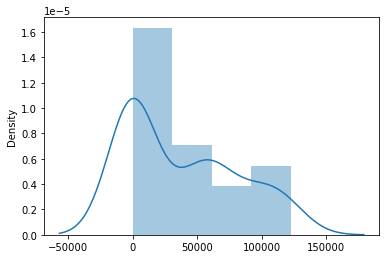

In [56]:
sns.distplot(data1)

#### Correlation analysis

In [57]:
data1.corr()

,YE,Sal
YE,1.000000,0.978242
Sal,0.978242,1.000000


<AxesSubplot:>

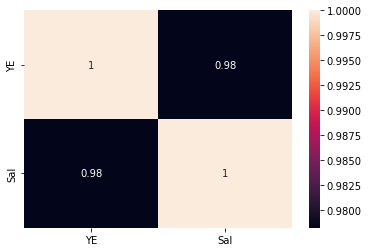

In [58]:
sns.heatmap(data1.corr(), annot=True)

<AxesSubplot:xlabel='YE', ylabel='Sal'>

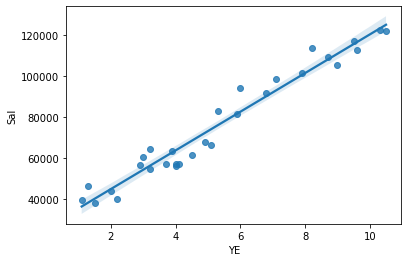

In [59]:
sns.regplot(x=data1['YE'],y=data1['Sal'])

#### Model building

In [84]:
model2=smf.ols("Sal~np.log(YE)",data=data1).fit()

In [85]:
model2.params

Intercept     14927.97177
np.log(YE)    40581.98796
dtype: float64

In [86]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Sal   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           3.25e-13
Time:                        15:12:39   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YE)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
model2.tvalues, model.pvalues

(Intercept      2.895135
 np.log(YE)    12.791989
 dtype: float64,
 Intercept     7.268813e-03
 np.log(YE)    3.250155e-13
 dtype: float64)

In [88]:
model2.rsquared , model.rsquared_adj

(0.8538888828756969, 0.8486706286926861)

In [89]:
model3=smf.ols("Sal~np.sqrt(YE)",data=data1).fit()

In [90]:
model3.params

Intercept     -16055.769117
np.sqrt(YE)    41500.680583
dtype: float64

In [77]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Sal   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           8.57e-18
Time:                        15:09:35   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
np.sqrt(YE)   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
model3.tvalues, model.pvalues

(Intercept      -3.262308
 np.sqrt(YE)    19.437148
 dtype: float64,
 Intercept     7.268813e-03
 np.log(YE)    3.250155e-13
 dtype: float64)

In [91]:
model3.rsquared , model.rsquared_adj

(0.9310009544993526, 0.8486706286926861)

In [80]:
model4=smf.ols("Sal~np.square(YE)",data=data1).fit()

In [81]:
model4.params

Intercept        48042.585515
np.square(YE)      776.318773
dtype: float64

In [82]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Sal   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     302.7
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           1.52e-16
Time:                        15:11:36   Log-Likelihood:                -311.59
No. Observations:                  30   AIC:                             627.2
Df Residuals:                      28   BIC:                             630.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.804e+04   2186.372     21.974      0.000    4.36e+04    5.25e+04
np.square(YE)   776.3188     44.624     17.397      0.000     684.911     867.726
==============================================================================
Omnibus:                        1.294   Durbin-Watson:                   0.883
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                1.240
Skew:                           0.409   Prob(JB):                        0.538
Kurtosis:                       2.432   Cond. No.                         72.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
model4.tvalues, model.pvalues

(Intercept        21.973654
 np.square(YE)    17.397015
 dtype: float64,
 Intercept     7.268813e-03
 np.log(YE)    3.250155e-13
 dtype: float64)

In [95]:
model4.rsquared , model.rsquared_adj

(0.9153198857852565, 0.8486706286926861)

In [96]:
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [97]:
new_data=pd.Series([2,6])
new_data

0    2
1    6
dtype: int64

In [98]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,2
1,6


In [99]:
model.predict(data1)

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64